In [ ]:
# Import the problem to solve
from pennylane.qaoa import min_vertex_cover

# Import utility functions
from utils import (
    create_connected_erdos_renyi_graph, 
    is_vertex_cover, 
    uncovered_edges,
    show_cover)

# Import algorithms

# Classical algorithms
from algorithms.classical import solve_vertex_cover

# Common components
from algorithms.commons import (
    StatePreparation, 
    CorrelationPreparation, 
    QAOAConfig, 
    OptimizationConfig)

# QIRO components
from algorithms.qiro import (
    Reducer,
    Simplifier,
    VertexCoverOnePointRule,
    VertexCoverTwoPointsRule,
    QIROSolver)

# QAOA components
from algorithms.qaoa import QAOASolver

In [2]:
# Create a connected Erdős-Rényi graph
nodes = 12
p = 0.30
seed = 111

G, _ = create_connected_erdos_renyi_graph(n=nodes, p=p, seed=seed)

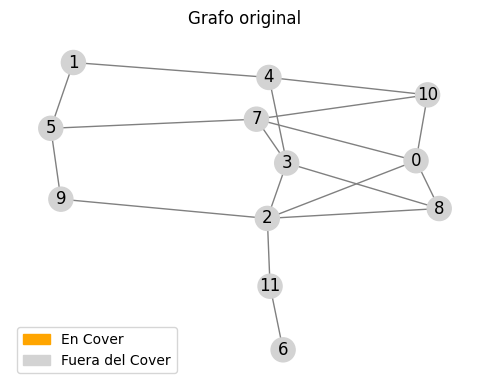

In [3]:
show_cover(G, set(), "Grafo original")

In [4]:
# Exact solution using classical algorithm
exact_cover = solve_vertex_cover(G)

In [5]:
print(exact_cover)

{0, 2, 4, 5, 7, 8, 11}


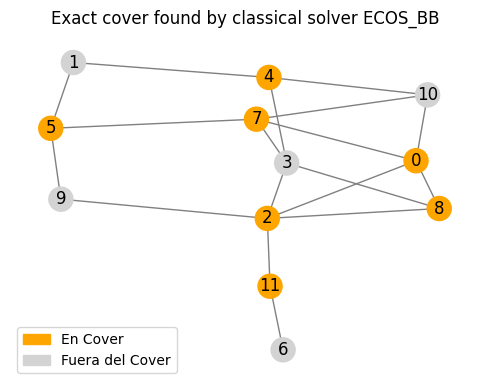

In [6]:
# Visualize results
show_cover(G, exact_cover, "Exact cover found by classical solver ECOS_BB")

In [8]:
# Configure and run QAOA solver
state_preparation_qaoa = StatePreparation(
    qaoa_config=QAOAConfig(
        p=2,
        shots=5000,
        device_name="lightning.qubit",
        hamiltonian_factory=min_vertex_cover,
        constrained=True
    )
)

# Instantiate QAOA solver
solver = QAOASolver(state_preparation=state_preparation_qaoa)

# Solve the problem
results = solver.solve(G)

In [9]:
print(f"Cover found by QAOA: {results}")

Cover found by QAOA: {2, 4, 5, 7, 8, 10, 11}


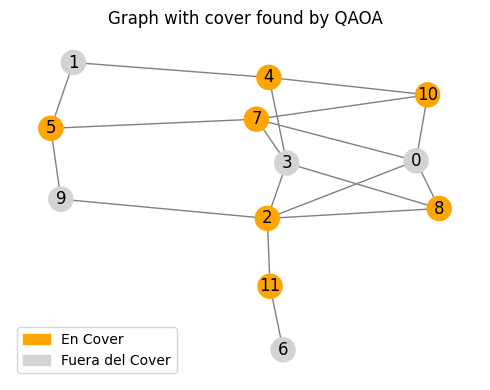

In [10]:
# Visualize results
show_cover(G, results, "Graph with cover found by QAOA")

In [11]:
# This parameter indicates whether to use Quantum Approximate Optimization Algorithm (False) or Quantum Alternating Operator Ansatz (True).
constrained = True

# Configuration for state preparation
state_preparation_config = QAOAConfig(
    p=1,
    hamiltonian_factory=min_vertex_cover,
    device_name="lightning.qubit",
    shots=5000,
    constrained=constrained
)

# Configuration for correlation preparation
correlation_config = QAOAConfig(
    p=1,
    hamiltonian_factory=min_vertex_cover,
    device_name="lightning.qubit",
    shots=5000,
    constrained=constrained
)

# Optimization configuration
#optimization_config = OptimizationConfig(
#    method="COBYLA",
#    tol=1e-3,
#    options={"maxiter": 100, "disp": True}
#)

# Instantiate state and correlation preparation
state_preparation = StatePreparation(qaoa_config=state_preparation_config)
correlation_preparation = CorrelationPreparation(qaoa_config=correlation_config)

# Instantiate simplifier with vertex cover rules
simplifier = Simplifier(VertexCoverOnePointRule(), VertexCoverTwoPointsRule())

# Instantiate reducer class with problem specific simplification rules
# and state and correlation preparation
reducer = Reducer(
    simplifier=simplifier,
    state_preparation=state_preparation,
    correlation_preparation=correlation_preparation
)

# Instantiate QIRO solver
qiro = QIROSolver(reducer=reducer)

Executing QIROSolver...
[MVC-3] Node 6 with ⟨Z⟩ = 0.4728 -> neighbors [11] added to cover, node 6 and neighbors removed from graph.
[MVC-1] Edge (1, 5) with correlation <ZZ> = -0.2680 -> node 5 added to cover.
[MVC-3] Node 1 with ⟨Z⟩ = 0.4956 -> neighbors [4] added to cover, node 1 and neighbors removed from graph.
[MVC-1] Edge (2, 9) with correlation <ZZ> = -0.4300 -> node 2 added to cover.
Isolated nodes removed: [9]
[MVC-1] Edge (3, 8) with correlation <ZZ> = -0.2896 -> node 3 added to cover.
[MVC-1] Edge (0, 8) with correlation <ZZ> = -0.4052 -> node 0 added to cover.
Isolated nodes removed: [8]
[MVC-1] Edge (7, 10) with correlation <ZZ> = -0.5076 -> node 7 added to cover.
Isolated nodes removed: [10]
Solution found: {0, 2, 3, 4, 5, 7, 11}


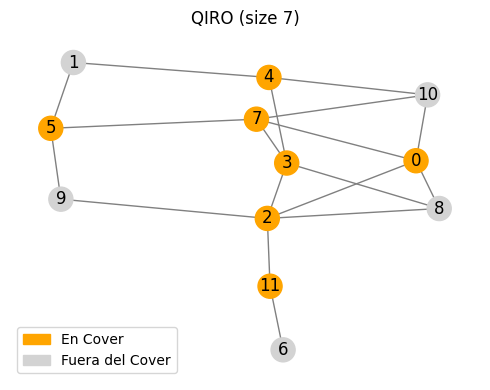

QIRO:  size 7, covers all: True
Edges not covered by QIRO: []


In [ ]:
print("Executing QIROSolver...")

qiro_cover = qiro.solve(graph=G)

print(f"Solution found: {qiro_cover}")

show_cover(G, qiro_cover, f"QIRO (size {len(qiro_cover)})")

print(f"QIRO:  size {len(qiro_cover)}, "f"covers all: {is_vertex_cover(G, qiro_cover)}")
print("Edges not covered by QIRO:", uncovered_edges(G, qiro_cover))